**DECLARACION DE LIBRERIAS**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# INFORMACION GENERAL DEL DATAFRAME

In [4]:
games=pd.read_csv("/content/games.csv")

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# PREPARACION DE LOS DATOS

In [7]:
# Se reemplaza los nombres de las columnas y se deja en minusculas

games.columns = games.columns.str.lower().str.replace(' ', '_')

# Se convierten las columnas necesarias a los tipos necesarios y se tratan datos ausentes

games["year_of_release"]=games["year_of_release"].fillna(0)
games["year_of_release"]=games["year_of_release"].astype(int)
games["year_of_release"]=games["year_of_release"].astype(str)
games["year_of_release"]=games["year_of_release"].replace('0',"No Info")

games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype(float)

games["name"]=games["name"].fillna("No Info")

games["genre"]=games["genre"].fillna("No Info")

games["rating"]=games["rating"].fillna("No Info")

*Nota(Cambio de tipo de datos):*

    Se cambio la columna["year_of_release"] de tipo float64 a tipo object, por que es una columna que contiene valores en donde no se hara ninguna operacion por lo tanto lo converti como si fuera texto.

    Tambien se cambio la columna ['user_score'] de tipo object a tipo float64, por que en esta columna contiene valores manipulables en donde se puede sacar un promedio o hacer otras operaciones.

*Nota(Tratamiento de datos ausentes):*

    Se tuvo que rellenar los datos ausentes de la columna ["year_of_release"] con 0 para poder cambiar la columna a tipo de datos enteros(para que el año no tenga decimales), despues lo volvi a cambiar a tipo de datos object y por ultimo los datos que se rellenaron con 0 los cambie por el texto "No Info" para que se viera mejor.

    Para la columna ["user_score"] tuve que reemplazar los datos "tbd"  a "nan"(dato ausente) para poder cambiar la columna a tipo de datos float64.

    En la columna ["name"] tiene dos valores ausentes, pense en eliminar esas dos filas pero verifique que tenia datos en la columna ["platform"] y en las columnas de ventas, asi que decidir solamente rellenar los datos ausentes por el texto "No Info" aunque no tenga mucha informacion pero esas dos filas nos dice que la plataforma GEN genero ingresos.

    En la columna ["genre"] es el mismo caso que la columna["name"], se relleno los datos ausentes por el texto "No Info".

    Yo pienso que en las columnas ["critic_score"] y ["user_score"] tienen datos ausentes porque no hubo comentarios de puntajes en esos juegos, por lo tanto se decide dejar asi los datos para poder hacer operaciones con los demas datos.


    En la columna ["rating"] simplemente se rellena los datos ausentes por el texto "No Info".

*¿Por qué crees que los valores están ausentes?*

    En el caso de las columnas ["critic_score"] y ["user_score"] pienso que los datos ausentes son porque no hubo comentarios de las personas acerca de la puntuacion de los juegos.

    Para las demas columnas talvez sea que al momento de hacer la recopilacion de datos hayan omitido datos o al momento de descargar el archivo se haya descargado con errores y esos errores se interpretaron como datos ausentes.

In [8]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


# ANALISIS DE LOS DATOS

In [9]:
# Mira cuántos juegos fueron lanzados en diferentes años.
games["year_of_release"].value_counts()

,count
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


¿Son significativos los datos de cada período?

    Cada dato es significativo ya que cada juego tuvo ingresos pero los periodos que tengan menos juegos lanzados son menos significativos.

In [10]:
# Observa cómo varían las ventas de una plataforma a otra.
games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


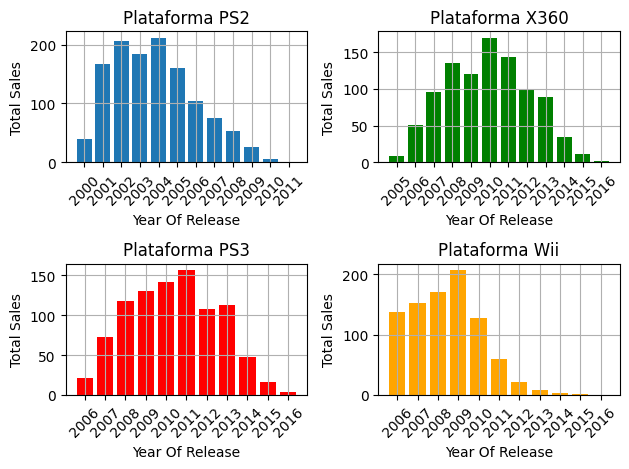

In [11]:
# Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

# Se filtran las plataformas basada en los datos de cada año y su suma de ventas
platform_sales = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_sales=pd.DataFrame(platform_sales)
platform_sales=platform_sales.query("year_of_release != 'No Info'")


# Plataforma PS2
platform_sales_ps2=platform_sales.query("platform == 'PS2'")
platform_sales_ps2=platform_sales_ps2.sort_values(by='year_of_release')
platform_sales_ps2=platform_sales_ps2.reset_index()
platform_sales_ps2=platform_sales_ps2.drop(columns='index')

#Plataforma X360
platform_sales_X360=platform_sales.query("platform == 'X360'")
platform_sales_X360=platform_sales_X360.sort_values(by='year_of_release')
platform_sales_X360=platform_sales_X360.reset_index()
platform_sales_X360=platform_sales_X360.drop(columns='index')

#Plataforma PS3
platform_sales_PS3=platform_sales.query("platform == 'PS3'")
platform_sales_PS3=platform_sales_PS3.sort_values(by='year_of_release')
platform_sales_PS3=platform_sales_PS3.reset_index()
platform_sales_PS3=platform_sales_PS3.drop(columns='index')

# Plataforma Wii
platform_sales_Wii=platform_sales.query("platform == 'Wii'")
platform_sales_Wii=platform_sales_Wii.sort_values(by='year_of_release')
platform_sales_Wii=platform_sales_Wii.reset_index()
platform_sales_Wii=platform_sales_Wii.drop(columns='index')

# Grafica de las Plataformas con mas ventas
plt.subplot(221)
plt.bar(platform_sales_ps2['year_of_release'], platform_sales_ps2['total_sales'])
plt.title("Plataforma PS2")
plt.xlabel("Year Of Release")
plt.ylabel("Total Sales")
plt.grid()
plt.xticks(rotation=45)

plt.subplot(222)
plt.bar(platform_sales_X360['year_of_release'], platform_sales_X360['total_sales'],color="green")
plt.title("Plataforma X360")
plt.xlabel("Year Of Release")
plt.ylabel("Total Sales")
plt.grid()
plt.xticks(rotation=45)

plt.subplot(223)
plt.bar(platform_sales_PS3['year_of_release'], platform_sales_PS3['total_sales'],color="red")
plt.title("Plataforma PS3")
plt.xlabel("Year Of Release")
plt.ylabel("Total Sales")
plt.grid()
plt.xticks(rotation=45)

plt.subplot(224)
plt.bar(platform_sales_Wii['year_of_release'], platform_sales_Wii['total_sales'],color="orange")
plt.title("Plataforma Wii")
plt.xlabel("Year Of Release")
plt.ylabel("Total Sales")
plt.grid()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

*¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?*

    Generalmente las plataformas tardan 1 o 2 años en tener sus ventas maximas y duran con sus buenas ventas unos 6 o 7 años hasta que pasan de moda y empieza a caer las ventas , el caso de la plataforma Wii es una excepcion porque desde el principio tuvo buenas ventas y asi duro 5 años hasta que cayo de picada, en todos los demas casos tuvieron una distrubucion norma.

*¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?*

    Las plataformas con mas ventas son:
        1. PS2
        2. X360
        3. PS3
        4. Wii
    Todas las plataformas tienen tendencias positivas y negativas, solamente que se comportan diferentes.
        

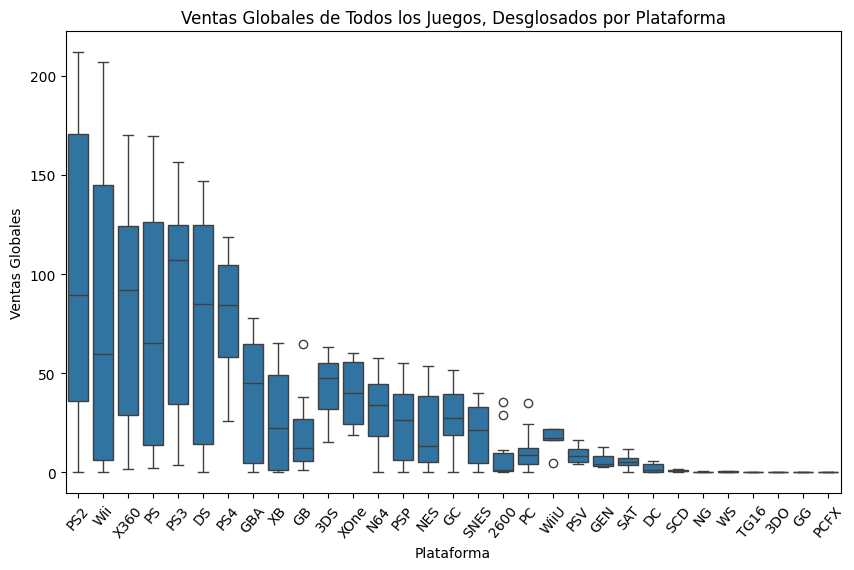

In [12]:
# Se crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=platform_sales) # la variable platform_sales se creo anteriormente es la agrupacion de plataformas y su suma de ventas al año
plt.title('Ventas Globales de Todos los Juegos, Desglosados por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=50)
plt.show()

*¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?*

    Si son significativas las diferencias en las ventas, se puede observar que las plataformas PS2, Wii, X360, PS, PS3, DS y PS4 tienen un promedio arriba de 50 millones mientras que las demas plataformas estan por debajo dicho numero.

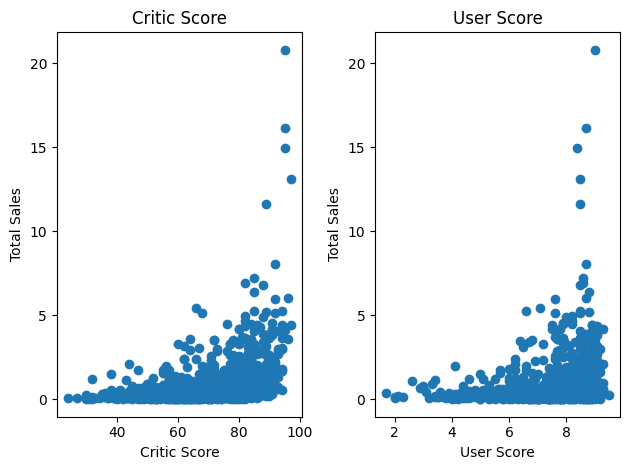

Correlacion Critic Score:  0.38921959991789346
Correlacion User Score:  0.1694198744859125


In [13]:
# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (PS2).

# Se filtran las plataformas basada en los datos de sus reseñas y su suma de ventas
platform_score_sales= games.groupby(['critic_score','user_score','name','platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_score_sales_ps2=platform_score_sales.query("platform == 'PS2'")
platform_score_sales_ps2=pd.DataFrame(platform_score_sales_ps2)

# Filtrado por critic_score
platform_critics_score_sales=platform_score_sales_ps2.sort_values(by='critic_score')
platform_critics_score_sales=platform_critics_score_sales.reset_index()
platform_critics_score_sales=platform_critics_score_sales.drop(columns='index')

# Filtrado po user_score
platform_user_score_sales=platform_score_sales_ps2.sort_values(by='user_score')
platform_user_score_sales=platform_user_score_sales.reset_index()
platform_user_score_sales=platform_user_score_sales.drop(columns='index')

# Se crea un gráficos de dispersión y se calcula la correlación entre las reseñas y las ventas.
plt.subplot(121)
plt.scatter(platform_critics_score_sales['critic_score'], platform_critics_score_sales['total_sales'])
plt.title("Critic Score")
plt.xlabel("Critic Score")
plt.ylabel("Total Sales")


plt.subplot(122)
plt.scatter(platform_user_score_sales['user_score'], platform_user_score_sales['total_sales'])
plt.title("User Score")
plt.xlabel("User Score")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()

print("Correlacion Critic Score: ",platform_critics_score_sales['critic_score'].corr(platform_critics_score_sales['total_sales']))
print("Correlacion User Score: ",platform_user_score_sales['user_score'].corr(platform_user_score_sales['total_sales']))



*Conclusiones*

    Con los graficos de dispersion podemos observar que tanto las reseñas de los usuarios y profesionales se comportan igual pero las reseñas de los profesionales influyen mas en las ventas, esto lo confirma la correlacion entre las reseñas y las ventas de cada uno.  Tambien tenemos que considerar el tipo de juego osea que entre mas popular sea el juego mas ventas tendra sin considerar cualquier reseña.

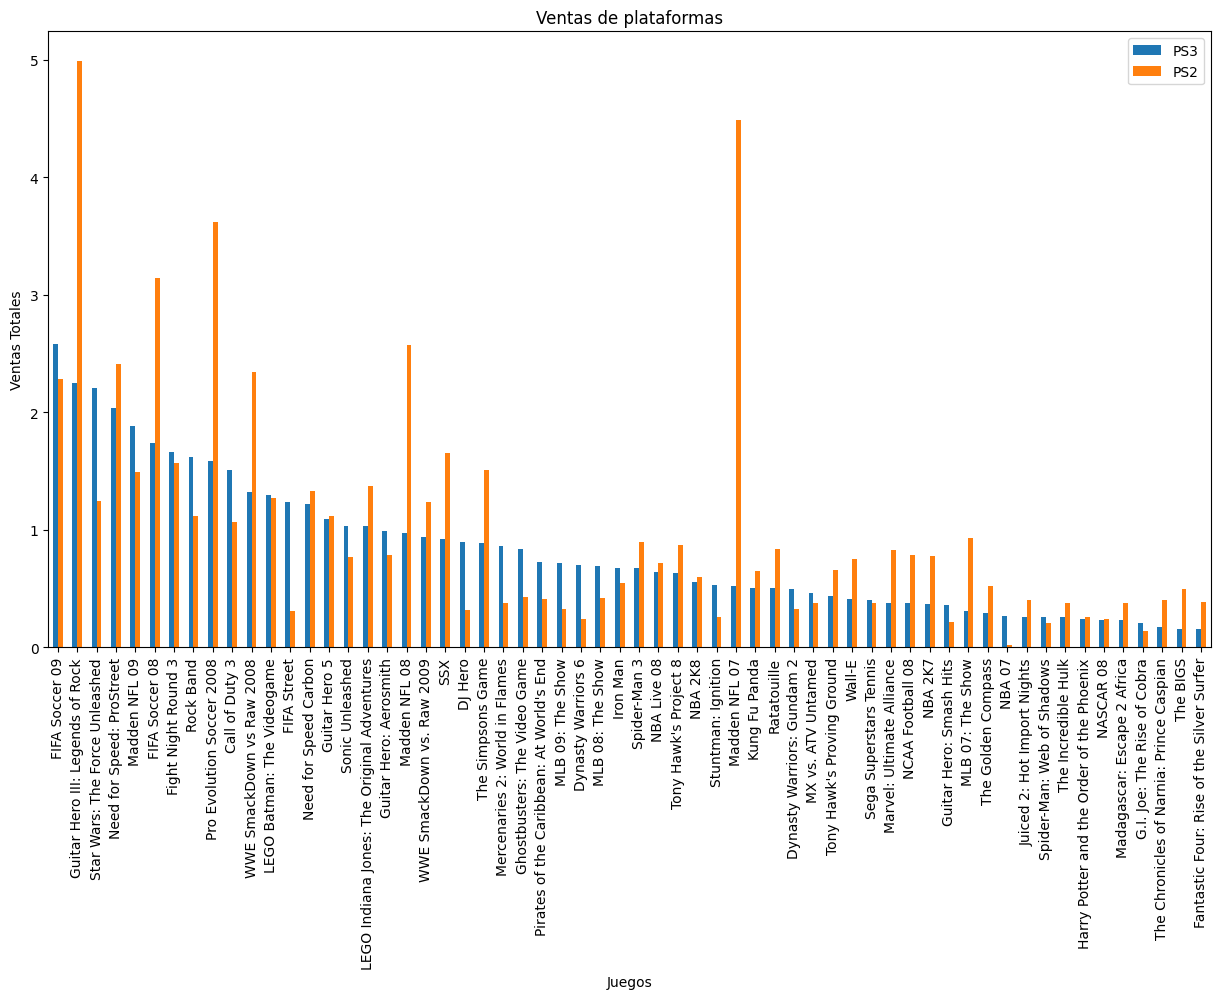

In [14]:
# Se compara las ventas de los juegos de la plataforma PS2 en la plataforma PS3.

platform_score_sales_ps3=platform_score_sales.query("platform == 'PS3'")
platform_score_sales_ps3=pd.DataFrame(platform_score_sales_ps3)

# La variable platform_score_sales_ps2 ya se habia declarado anteriormente y al combinarse con platform_score_sales_ps3, solamente muestra los juegos en comun
platform_score_sales_ps2_ps3=pd.merge(platform_score_sales_ps3, platform_score_sales_ps2, on='name', how='inner')
platform_score_sales_ps2_ps3


platform_score_sales_ps2_ps3.plot(x='name',
        y=["total_sales_x","total_sales_y"],
        kind='bar',
        title='Ventas de plataformas',
        xlabel='Juegos',
        ylabel='Ventas Totales',
        figsize=(15, 8))

plt.legend(["PS3","PS2"])
plt.show()

In [15]:
# Echa un vistazo a la distribución general de los juegos por género.

games_genre=games.groupby("genre")["name"].count().sort_values(ascending=False)
games_genre=pd.DataFrame(games_genre)
games_genre=games_genre.reset_index()
games_genre=games_genre.rename(columns={"name":"count"})


games_genre_sales=games.groupby("genre")["total_sales"].sum().sort_values(ascending=False)
games_genre_sales=pd.DataFrame(games_genre_sales)
games_genre_sales=games_genre_sales.reset_index()


print(games_genre)
print("")
print(games_genre_sales)

           genre  count
0         Action   3369
1         Sports   2348
2           Misc   1750
3   Role-Playing   1498
4        Shooter   1323
5      Adventure   1303
6         Racing   1249
7       Platform    888
8     Simulation    873
9       Fighting    849
10      Strategy    683
11        Puzzle    580
12       No Info      2

           genre  total_sales
0         Action      1744.17
1         Sports      1331.27
2        Shooter      1052.45
3   Role-Playing       934.56
4       Platform       827.77
5           Misc       802.51
6         Racing       728.67
7       Fighting       447.53
8     Simulation       389.97
9         Puzzle       242.57
10     Adventure       237.59
11      Strategy       174.23
12       No Info         2.42


*¿Qué se puede decir de los géneros más rentables?*

    Los generos Action y Sports son los juegos que mas hay, por lo tanto son los mas rentables. En conclusion de estos generos es razonable que haya mas juegos porque se venden mas.

*¿Puedes generalizar acerca de los géneros con ventas altas y bajas?*

    La respuesta es si porque por ejemplo en los generos Shooter y Adventure tienen casi el mismo numero de juegos pero en el genero Shooter tiene mucho mas ventas que el Adventure, hay una diferencia de 20 juegos y una diferencia de 814.86 millones de ventas.

# PERFIL DE USUARIO PARA CADA REGION

**Para cada región (NA, EU, JP) determina:**

**Las cinco plataformas principales.**

In [16]:
#NA
games_na_sales=games.groupby("platform")["na_sales"].sum().sort_values(ascending=False)
games_na_sales=pd.DataFrame(games_na_sales)
games_na_sales=games_na_sales.reset_index()
games_na_sales=games_na_sales.head(5)

#UE
games_eu_sales=games.groupby("platform")["eu_sales"].sum().sort_values(ascending=False)
games_eu_sales=pd.DataFrame(games_eu_sales)
games_eu_sales=games_eu_sales.reset_index()
games_eu_sales=games_eu_sales.head(5)

#JP
games_jp_sales=games.groupby("platform")["jp_sales"].sum().sort_values(ascending=False)
games_jp_sales=pd.DataFrame(games_jp_sales)
games_jp_sales=games_jp_sales.reset_index()
games_jp_sales=games_jp_sales.head(5)


print(games_na_sales)
print(games_eu_sales)
print(games_jp_sales)


  platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40
  platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61
  platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67


*Describe las variaciones en sus cuotas de mercado de una región a otra.*

    Con los resultados podemos observar que por mucho hay mas ventas en la region NA, despues sigue la region EU y por ultimo esta la region JP.

    Podemos notar que la plataforma PS2 esta en las 5 plataformas principales para las 3 regiones.



**Los cinco géneros principales.**

In [17]:
# Los cinco géneros principales.

#NA
games_na_genre=games.groupby("genre")["na_sales"].sum().sort_values(ascending=False)
games_na_genre=pd.DataFrame(games_na_genre)
games_na_genre=games_na_genre.reset_index()
games_na_genre=games_na_genre.head(5)

#UE
games_eu_genre=games.groupby("genre")["eu_sales"].sum().sort_values(ascending=False)
games_eu_genre=pd.DataFrame(games_eu_genre)
games_eu_genre=games_eu_genre.reset_index()
games_eu_genre=games_eu_genre.head(5)

#JP
games_jp_genre=games.groupby("genre")["jp_sales"].sum().sort_values(ascending=False)
games_jp_genre=pd.DataFrame(games_jp_genre)
games_jp_genre=games_jp_genre.reset_index()
games_jp_genre=games_jp_genre.head(5)


print(games_na_genre)
print("")
print(games_eu_genre)
print("")
print(games_jp_genre)

      genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27

     genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74

          genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11


*Explica la diferencia.*

    Podemos ver que en la region NA predomina en las ventas, despues de EU y por ultimo JP.

    En las regiones NA y EU los cinco principales generos son muy simirales solamente cambia un genero y en la region JP el principal genero es Role-Playing no como las regiones NA y EU.

**Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.**

In [18]:
#NA
games_na_rating=games.groupby("rating")["na_sales"].sum().sort_values(ascending=False)
games_na_rating=pd.DataFrame(games_na_rating)
games_na_rating=games_na_rating.reset_index()

#EU
games_eu_rating=games.groupby("rating")["eu_sales"].sum().sort_values(ascending=False)
games_eu_rating=pd.DataFrame(games_eu_rating)
games_eu_rating=games_eu_rating.reset_index()

#JP
games_jp_rating=games.groupby("rating")["jp_sales"].sum().sort_values(ascending=False)
games_jp_rating=pd.DataFrame(games_jp_rating)
games_jp_rating=games_jp_rating.reset_index()

print(games_na_rating)
print("")
print(games_eu_rating)
print("")
print(games_jp_rating)

    rating  na_sales
0        E   1292.99
1  No Info   1242.46
2        T    759.75
3        M    748.48
4     E10+    353.32
5      K-A      2.56
6       EC      1.53
7       AO      1.26
8       RP      0.00

    rating  eu_sales
0        E    710.25
1  No Info    613.83
2        M    483.97
3        T    427.03
4     E10+    188.52
5       AO      0.61
6      K-A      0.27
7       EC      0.11
8       RP      0.08

    rating  jp_sales
0  No Info    841.96
1        E    198.11
2        T    151.40
3        M     64.24
4     E10+     40.20
5      K-A      1.46
6       AO      0.00
7       EC      0.00
8       RP      0.00


*¿Las clasificaciones de ESRB afectan a las ventas en regiones individuales?*

    La respuesta es si, podemos observar que tenemos diferentes ventas en las mismas clasificaciones.
    
    Por ejemplo en la clasificacion E, en la region NA hay un total de ventas de 1292.99, para EU tenemos 710.25 y para JP tenemos 198.11.

# PRUEBA DE HIPOTESIS

**Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

*— Cómo formulaste las hipótesis nula y alternativa.*

    Hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
    
    Hipotesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
    
*— Qué criterio utilizaste para probar las hipótesis y por qué.*

    Utilize la funcion scipy.stats.ttest_ind() porque en este caso tenemos dos medias que queremos comprobar si son iguales, osea dos poblaciones diferentes, por lo tanto esta funcion es la indicada.

In [28]:
# Calificaciones de Xbox One
xbox_one_ratings = games[games['platform'] == 'XOne']['user_score']
xbox_one_ratings=pd.DataFrame(xbox_one_ratings)
xbox_one_ratings=xbox_one_ratings.dropna()

# Calificaciones de PC
pc_ratings = games[games['platform'] == 'PC']['user_score']
pc_ratings=pd.DataFrame(pc_ratings)
pc_ratings=pc_ratings.dropna()

# Prueba de hipotesis
alpha = 0.05 # Nivel de significación estadística

# Prueba de levene
results_levene=st.levene(xbox_one_ratings, pc_ratings)
print("Valor p levene:", results_levene.pvalue)

# Prueba de t
results = st.ttest_ind(xbox_one_ratings, pc_ratings,equal_var=True)

print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.")
else:
    print("No se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.")

Valor p levene: [0.26939515]
Valor p: [1.38964355e-05]
Se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.


**Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

*— Cómo formulaste las hipótesis nula y alternativa.*

    Hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
    
    Hipotesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
    
*— Qué criterio utilizaste para probar las hipótesis y por qué.*

    Es el mismo caso, tenemos dos medias diferentes, por lo tanto dos poblaciones diferentes, por lo tanto se utilizo la funcion scipy.stats.ttest_ind().

    En la hipotesis nula siempre la formulo como la igualdad porque en la funcion cipy.stats.ttest_ind() nos indica que lo que estamos comparando es igual.

In [30]:
# Calificaciones de juegos de acción
accion_ratings = games[games['genre'] == 'Action']['user_score']
accion_ratings=pd.DataFrame(accion_ratings)
accion_ratings=accion_ratings.dropna()

# Calificaciones de juegos de deportes
deporte_ratings = games[games['genre'] == 'Sports']['user_score']
deporte_ratings=pd.DataFrame(deporte_ratings)
deporte_ratings=deporte_ratings.dropna()

# Prueba de hipotesis

alpha=0.05 # Nivel de significación estadística

# Prueba de levene
results_levene = st.levene(accion_ratings, deporte_ratings)
print("Valor p levene:", results_levene.pvalue)

# Prueba de t
results = st.ttest_ind(accion_ratings, deporte_ratings, equal_var=False)

print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")

Valor p levene: [0.00017366]
Valor p: [0.11483819]
No se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


# CONCLUSIÓN GENERAL

Este proyecto me gusto porque aplique todo lo que he aprendido hasta ahora, siento que ya estoy dominando mas la parte de la preparacion y limpieza de datos, en el paso de analisis de datos se me complico un poco por la interpretacion de lo que me pedian y de como hacer el codigo para poder graficar exactamente lo que se queria reflejar pero siento que con la practica cada vez se me hara mas facil y en la parte de la hipotesis todavia me confundo un poco pero siento que ya esta casi dominado.